# Hawks Dataset Analysis

In this notebook, I perform exploratory analysis of the Hawks dataset, which is the dataset used extensively throughout this respository for different algorithms.

---


First, load the relevant libraries needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D

# Set the Seaborn theme
sns.set_theme()

## Data Preparation

The first step is preparing the data, specifically understanding the variables and observations being used, and considering if any futher data processing is necessary.

In [2]:
# Read in the data
hawks = pd.read_csv("hawks.csv")
hawks

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


The dataset has 908 observations of 19 attributes. Not all attributes seem useful for the classification/regression tasks I have in mind and there are also many missing values. 

First, I remove the columns I am certain I will not use, specifically ones that are time-centric. I'm more interested in using the actual characteristics of the hawks to make predictions.

In [3]:
hawks = hawks.drop(columns = ["Month", "Day", "Year", "CaptureTime", "ReleaseTime", "BandNumber"])
hawks

,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


Next, let's take a close examination of the number of missing values in each column.

In [4]:
hawks.isnull().mean()

Species         0.000000
Age             0.000000
Sex             0.634361
Wing            0.001101
Weight          0.011013
Culmen          0.007709
Hallux          0.006608
Tail            0.000000
StandardTail    0.371145
Tarsus          0.917401
WingPitFat      0.915198
KeelFat         0.375551
Crop            0.377753
dtype: float64

Some columns have a lot of missing values! I'm going to remove any columns where there are more than 20% of the data missing.

In [5]:
hawks = hawks.loc[:, hawks.isnull().mean() < 0.20]
hawks

,Species,Age,Wing,Weight,Culmen,Hallux,Tail
0,RT,I,385.0,920.0,25.7,30.1,219
1,RT,I,376.0,930.0,NaN,NaN,221
2,RT,I,381.0,990.0,26.7,31.3,235
3,CH,I,265.0,470.0,18.7,23.5,220
4,SS,I,205.0,170.0,12.5,14.3,157
...,...,...,...,...,...,...,...
903,RT,I,380.0,1525.0,26.0,27.6,224
904,SS,I,190.0,175.0,12.7,15.4,150
905,RT,I,360.0,790.0,21.9,27.6,211
906,RT,I,369.0,860.0,25.2,28.0,207


Finally, I subset the dataset to observations where there are no missing values at all to make things simpler.

In [6]:
hawks = hawks.dropna(axis=0)
hawks

,Species,Age,Wing,Weight,Culmen,Hallux,Tail
0,RT,I,385.0,920.0,25.7,30.1,219
2,RT,I,381.0,990.0,26.7,31.3,235
3,CH,I,265.0,470.0,18.7,23.5,220
4,SS,I,205.0,170.0,12.5,14.3,157
5,RT,I,412.0,1090.0,28.5,32.2,230
...,...,...,...,...,...,...,...
903,RT,I,380.0,1525.0,26.0,27.6,224
904,SS,I,190.0,175.0,12.7,15.4,150
905,RT,I,360.0,790.0,21.9,27.6,211
906,RT,I,369.0,860.0,25.2,28.0,207


We have gone from the original 908 rows and 19 columns dataset to a final usable dataset with 891 rows and 7 columns. Most of the observations in the original dataset are kept!

The final dataset has 2 character columns and 5 numeric columns:

In [7]:
hawks.dtypes

Species     object
Age         object
Wing       float64
Weight     float64
Culmen     float64
Hallux     float64
Tail         int64
dtype: object

### Feature Plots

### Data Splitting

The dataset will also be split into a training set and testing set. Using the Pareto Principle, 80% of the dataset will be used to train a given machine learning model, and 20% of the datset will be used to test the model.

Usage of scikit-learn's `train_test_split` function allows for partitioning the dataset randomly, and the `random_state=1` parameter ensures that this split will be the same every time the function is run.

In [8]:
# Set up predictors matrix (X) and response vector (y)
X = hawks.loc[:, hawks.columns != "Species"].to_numpy()
y = hawks["Species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 6) (712,)
(179, 6) (179,)


This exact train/test split will be utilized for every algorithm in this repository.

It is important that the training set is a good representation. Below, I will plot the training and testing set side by side to see their differences.

In [9]:
# For color coding points
species_colors = {"RT": "red", "CH": "gold", "SS": "blue"}

# For a custom legend
species_names = {"RT": "Red-tailed", "CH": "Cooper's", "SS": "Sharp-shinned"}
custom_legend = [Line2D([], [], marker='.', color='red', linestyle='None'),
                 Line2D([], [], marker='.', color='gold', linestyle='None'),
                 Line2D([], [], marker='.', color='blue', linestyle='None')]

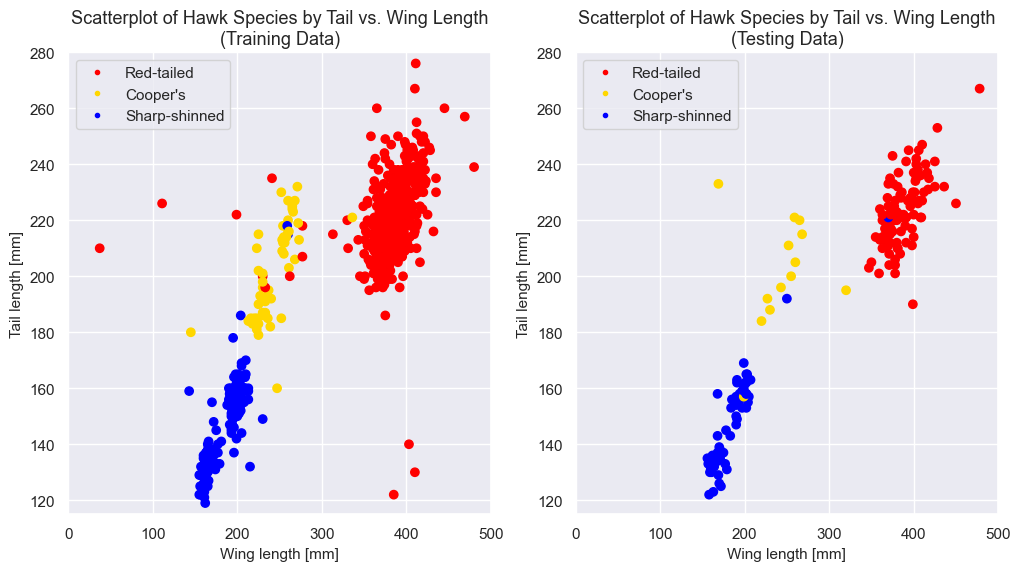

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_xlim((0, 500))
ax1.set_ylim((115, 280))
ax1.scatter(X_train[:, 1], X_train[:, 5], color = [species_colors[y] for y in y_train])
ax1.set_xlabel("Wing length [mm]", fontsize = 11)
ax1.set_ylabel("Tail length [mm]", fontsize = 11)
ax1.set_title("Scatterplot of Hawk Species by Tail vs. Wing Length\n(Training Data)", fontsize = 13)
ax1.legend(fontsize = 11, loc = "upper left", handles = custom_legend, labels = species_names.values())

# Plot the testing set
ax2.set_xlim((0, 500))
ax2.set_ylim((115, 280))
ax2.scatter(X_test[:, 1], X_test[:, 5], color = [species_colors[y] for y in y_test])
ax2.set_xlabel("Wing length [mm]", fontsize = 11)
ax2.set_ylabel("Tail length [mm]", fontsize = 11)
ax2.set_title("Scatterplot of Hawk Species by Tail vs. Wing Length\n(Testing Data)", fontsize = 13)
ax2.legend(fontsize = 11, loc = "upper left", handles = custom_legend, labels = species_names.values())
plt.show()

I argue that the training set is representative. Both training and testing set contain "anamolies" in terms of data points that deviate from their species cluster and similar areas. It will be interesting to see how the different algorithms will deal with these data points in terms of overfitting.

The spread of values in the testing set is over a smaller range, but both the training and testing sets share the same general trend in terms of hawk species by wing/tail length.